Fig S2: Histogram of the distribution of initial PartMC and MEGAPOLI dataset over each feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


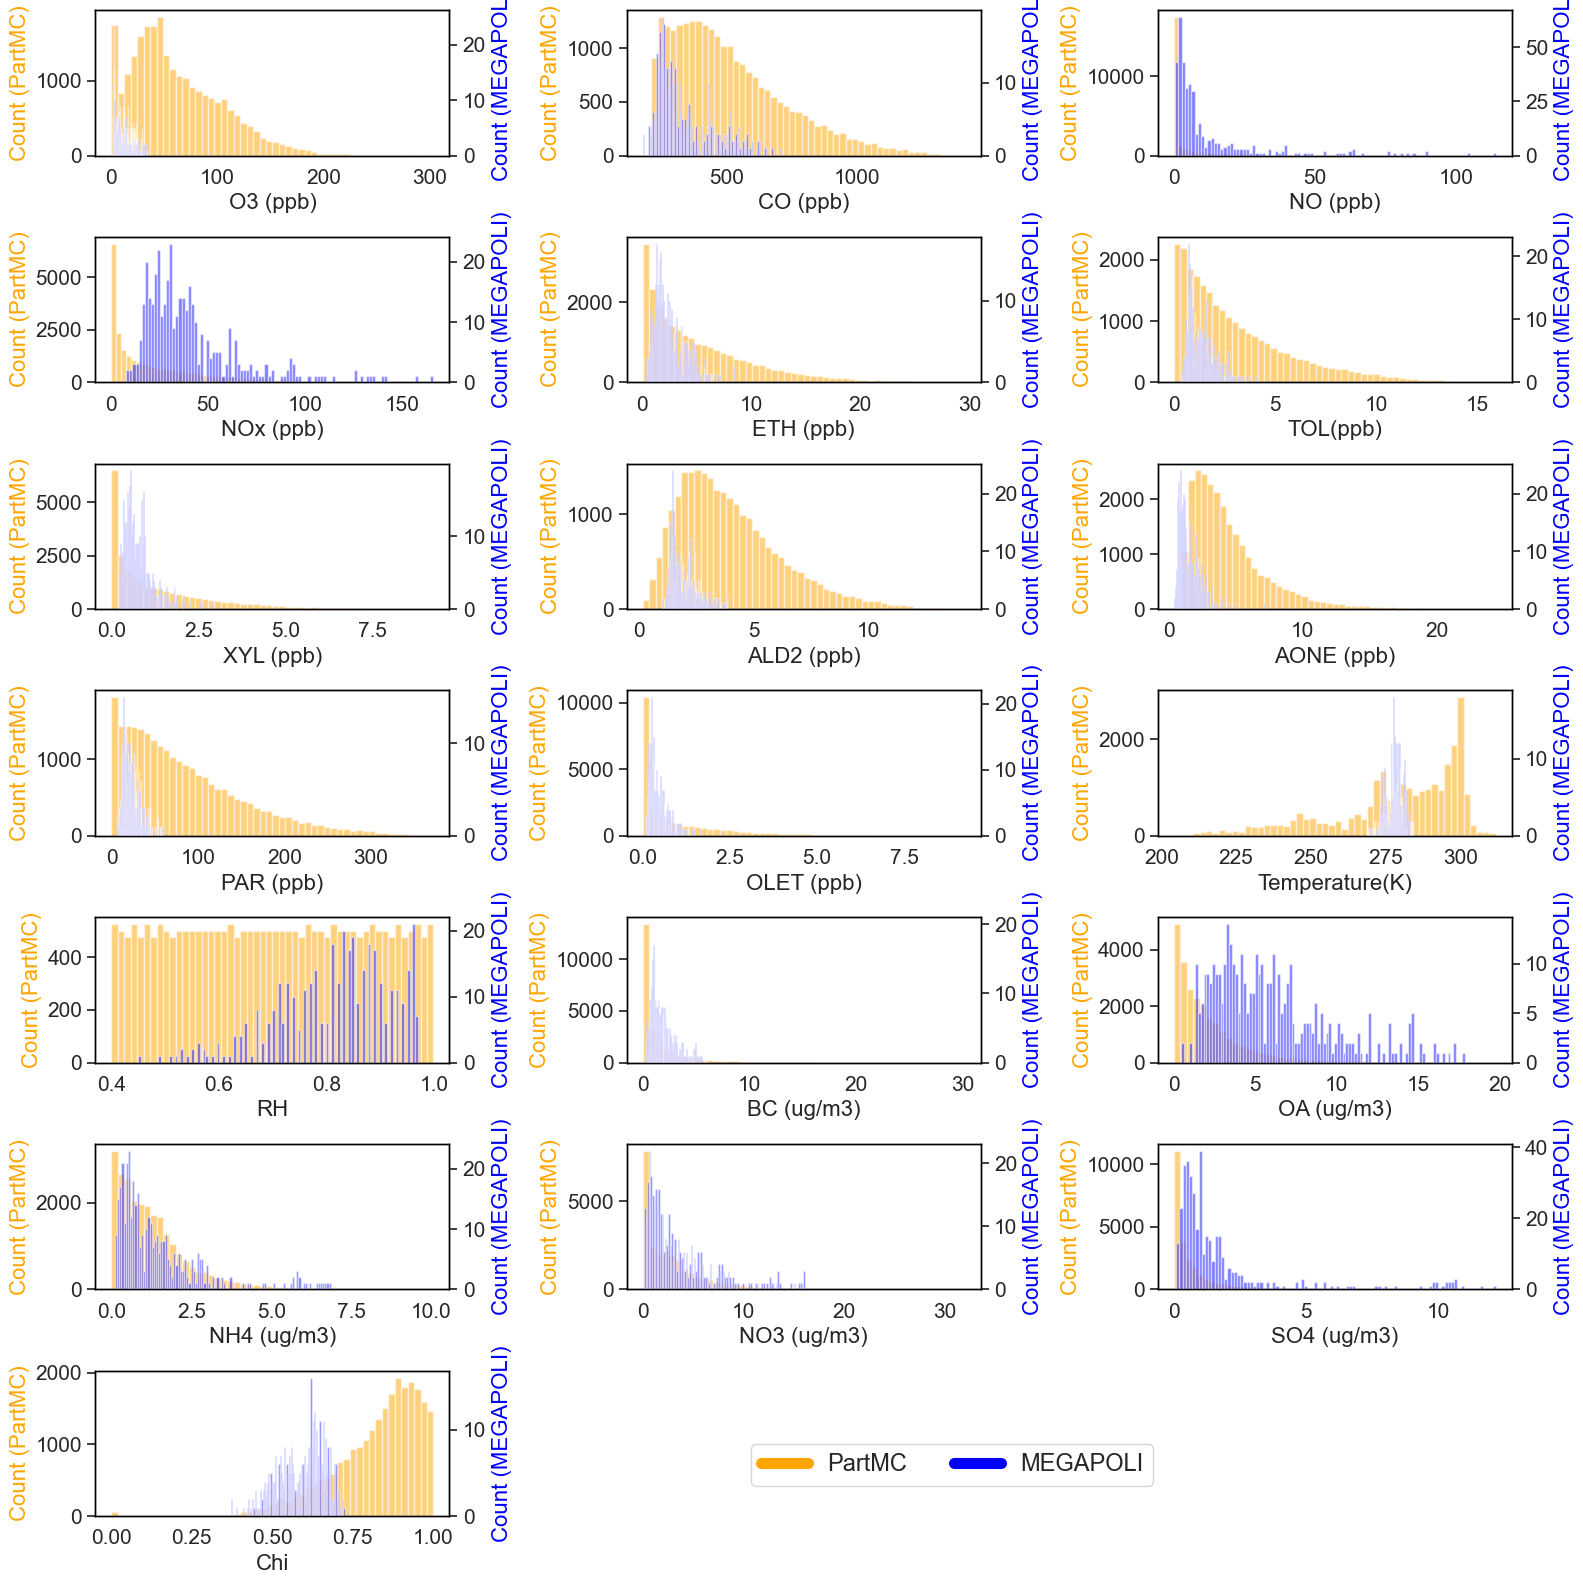

In [33]:
# Load the datasets
partmc_data = pd.read_csv('../Data/PartMC_data/PartMC_data.csv')
megapoli_data = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine.csv')

# Conversion factor for ppb to µg/m³ (placeholder, replace with correct value if known)
conversion_factor = 1.0

# Define the updated features list
features_updated = ['O3 (ppb)', 'CO (ppb)', 'NO (ppb)', 'NOx (ppb)',
                    'ETH (ppb)', 'TOL(ppb)', 'XYL (ppb)', 'ALD2 (ppb)',
                    'AONE (ppb)', 'PAR (ppb)', 'OLET (ppb)', 'Temperature(K)', 'RH',
                    'BC (ug/m3)', 'OA (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)',
                    'Chi']

# Calculate the grid size for square plots
n_features = len(features_updated)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # To round up




# Set up the subplots with square aspect ratio
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_updated):
    ax = axes[i]
    ax2 = ax.twinx()
    
    partmc_hist = ax.hist(partmc_data[feature], bins=50, color='orange', alpha=0.5, label='PartMC')
    ax.set_xlabel(feature, fontsize=16)
    ax.set_ylabel('Count (PartMC)', color='orange', fontsize=16)
    ax.tick_params(axis='both', labelsize=15)
    
    megapoli_hist = ax2.hist(megapoli_data[feature], bins=100, color='blue', alpha=0.5, label='MEGAPOLI')
    ax2.set_ylabel('Count (MEGAPOLI)', color='blue', fontsize=16)
    ax2.tick_params(axis='y', labelsize=15)

    ax.grid(False)  # Remove grid
    ax2.grid(False)

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


# Remove empty plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Creating a common legend
custom_lines = [plt.Line2D([0], [0], color='orange', lw=8),
                plt.Line2D([0], [0], color='blue', lw=8)]
fig.legend(custom_lines, ['PartMC', 'MEGAPOLI'], loc='upper center', ncol=2, bbox_to_anchor=(0.6, 0.1), fontsize = 17)

# Adjust layout
plt.tight_layout()
# fig.savefig('../graphics/feature_distributions.pdf', dpi=400)

# Show plot
plt.show()

Fig S1: #### Figure S2: Histogram of the distribution of initial PartMC and MEGAPOLI dataset over each feature

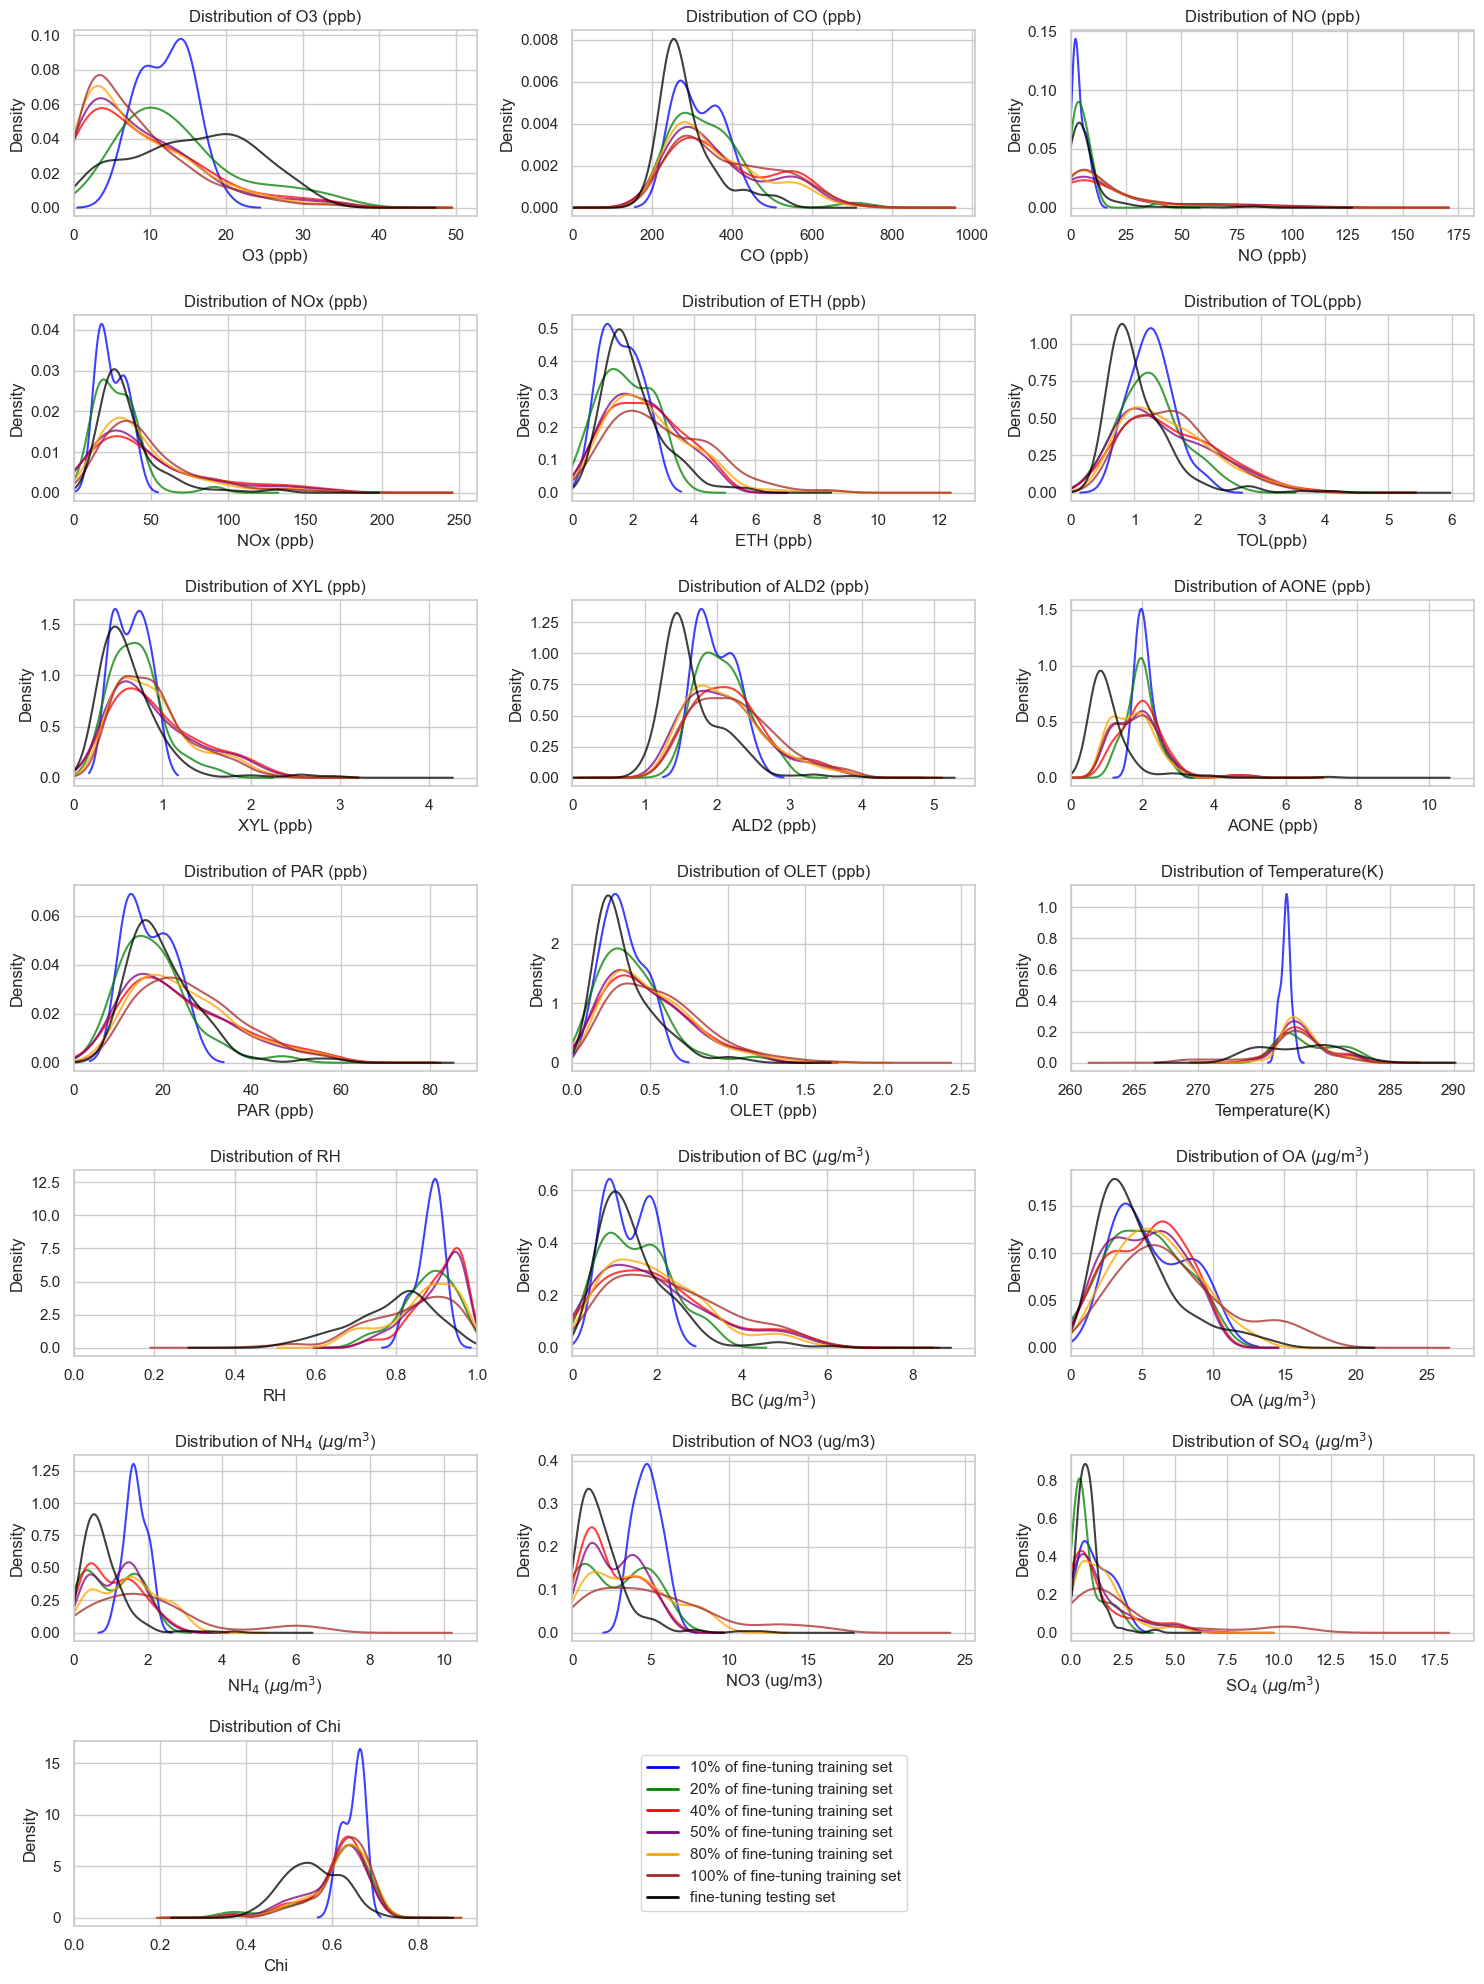

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all the files
file_paths = [
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_5%.csv', # 5% is for total MGEAPOLI data, for fine-tuning training dataset is 10%, same as below
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_10%.csv',
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_20%.csv',
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_25%.csv',
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_40%.csv',
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_train_50%.csv',
    '../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_50%.csv',
]

# Load the CSVs into dataframes
dfs = [pd.read_csv(file) for file in file_paths]

# Select the numeric columns for feature distribution visualization
# numeric_columns = dfs[0].select_dtypes(include=['float64', 'int64']).columns
numeric_columns = ['O3 (ppb)', 'CO (ppb)', 'NO (ppb)', 'NOx (ppb)',
        'ETH (ppb)', 'TOL(ppb)', 'XYL (ppb)', 'ALD2 (ppb)',
       'AONE (ppb)', 'PAR (ppb)', 'OLET (ppb)', 'Temperature(K)', 'RH',
       'BC (ug/m3)', 'OA (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)','Chi']

# Prepare colors for the datasets
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'black']
labels = ['10% of fine-tuning training set', '20% of fine-tuning training set', '40% of fine-tuning training set', '50% of fine-tuning training set', '80% of fine-tuning training set', '100% of fine-tuning training set', 'fine-tuning testing set']

# Updated labels for converted units
converted_features = {
    'BC (ug/m3)': 'BC ($\mu$g/m$^3$)',
    'OA (ug/m3)': 'OA ($\mu$g/m$^3$)',
    'NH4 (ug/m3)': 'NH$_4$ ($\mu$g/m$^3$)',
    'NO3 (ug/m3b)': 'NO$_4$ ($\mu$g/m$^3$)',
    'SO4 (ug/m3)': 'SO$_4$ ($\mu$g/m$^3$)'
}

# Calculate the minimum values for each numeric column across all dataframes
min_values = pd.concat(dfs).select_dtypes(include=['float64', 'int64']).min()

# Identify the temperature-related column (assuming it might contain 'temperature' or similar in the name)
temp_column = [col for col in numeric_columns if 'temp' in col.lower() or 'temperature' in col.lower()]
temp_column = temp_column[0] if temp_column else None

# Plot the distribution of each feature for all datasets using line plots
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    feature_label = converted_features.get(col, col)  # Apply unit conversion in the plot label
    # Set minimum x-axis for temperature column specifically
    if col == 'Temperature(K)':
        x_min, x_max = 260, None
    elif col == 'RH':
        x_min, x_max = 0, 1
    else:
        x_min, x_max = min_values[col] if min_values[col] < 0 else 0, None  # Default to column minimum
    
    for j, df in enumerate(dfs):
        df[col].plot(kind='density', ax=axes[i], color=colors[j], label=labels[j], alpha=0.75)
    axes[i].set_title(f"Distribution of {feature_label}")
    axes[i].set_xlabel(feature_label)
    axes[i].set_ylabel("Density")
    axes[i].set_xlim(left=x_min, right=x_max)  # Set x-axis based on the specified minimum
    axes[i].ticklabel_format(useOffset=False)  # Ensure x-axis labels start from x_min without offset


# Remove the last axis and place the legend there
axes[len(numeric_columns)].axis('off')
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors]
axes[len(numeric_columns)].legend(handles=handles, labels=labels, loc='center')

# Hide the last axis if it's unused
for ax in axes[len(numeric_columns)+1:]:
    ax.axis('off')

plt.tight_layout()
# fig.savefig('MEGAPOLI_feature_distributions.png', dpi=400)
# fig.savefig('../graphics/MEGAPOLI_feature_distributions.pdf', dpi=400)

plt.show()


Poster Fig: Comparison of predicted mixing state index (χpred) with fine-tuned model and baseline models over time. Gaps in the time series where intervals exceed 2 hours are excluded from the plot.

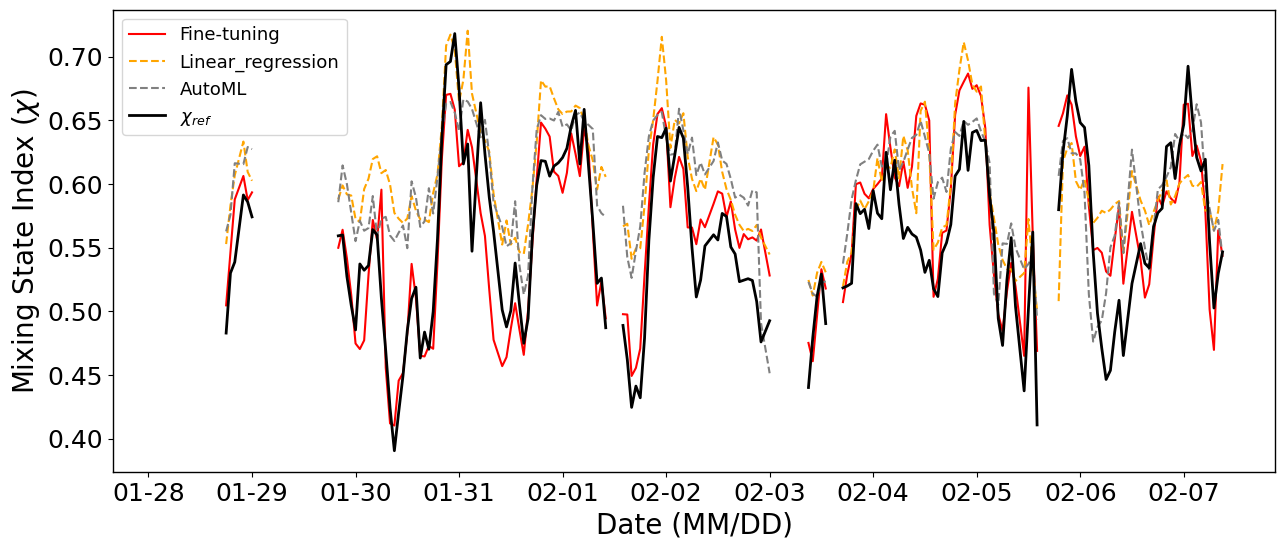

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


dataframes = {
    'Fine-tuning': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_50%Data.csv'),
    'Linear_regression': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/LR_50%Data.csv'),
    'AutoML': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/AutoML_50%Data.csv')
}

# Load the time data
time_data_path = '../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_50%.csv'
time_df = pd.read_csv(time_data_path)

# Extracting the 'Time' column for use as the time axis
time_series = pd.to_datetime(time_df['Time'])

# Calculate the time difference between consecutive time points
time_diff = time_series.diff().dt.total_seconds() / 3600.0  # convert time difference to hours

# Set a threshold for the gap (2 hours) and create a mask for large gaps
threshold = 2  # in hours
gap_mask = time_diff > threshold
colors = ['red', 'orange', 'gray']

percentages = ['Fine-tuning', 'Linear_regression', 'AutoML']

# Plotting y_pred values for each dataset with actual time, and breaking lines where gaps exceed 2 hours
plt.figure(figsize=(15, 6))


# Plot each dataset's y_pred, accounting for gaps
for i, (key, df) in enumerate(dataframes.items()):
    plt.plot(time_series[:len(df)].where(~gap_mask[:len(df)]), df['y_pred'], 
             label=f'{percentages[i]}', linestyle='--' if percentages[i] != 'Fine-tuning' else '-', color=colors[i])

# Overlay y_true, accounting for gaps
plt.plot(time_series[:len(dataframes['Fine-tuning'])].where(~gap_mask[:len(dataframes['Fine-tuning'])]), 
         dataframes['Fine-tuning']['y_true'], label='$\chi_{ref}$', color='black', linewidth=2)

# Adding labels and title
plt.xlabel('Date (MM/DD)', fontsize=20)
plt.ylabel('Mixing State Index ($\chi$)', fontsize=20)
# plt.title('Comparison of y_pred and y_true over Actual Time with Gaps Considered')
# Setting legend with specific font size and location
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=13)
# plt.legend(loc='lower center',  ncol=4, fontsize=13, bbox_to_anchor=(0.5, -0.34))
plt.legend(loc='upper left',  ncol=1, fontsize=13)

# Setting the tick parameters and formatting for the x-axis
plt.tick_params(axis='both', labelsize=18)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # daily interval

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)
# Set the plot's border to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# plt.savefig('../graphics/Fine_tune_results/pred_vs_true_comparison.pdf', dpi=400)

# Show the plot
plt.show()

Fig 2 (c): Comparison of predicted mixing state index (χpred) across different fine-tuning training datasets (10%, 20%, 40%, 50%, 80%, and 100%) with the MEGAPOLI observational data (χref) over time. Gaps in the time series where intervals exceed 2 hours are excluded from the plot.

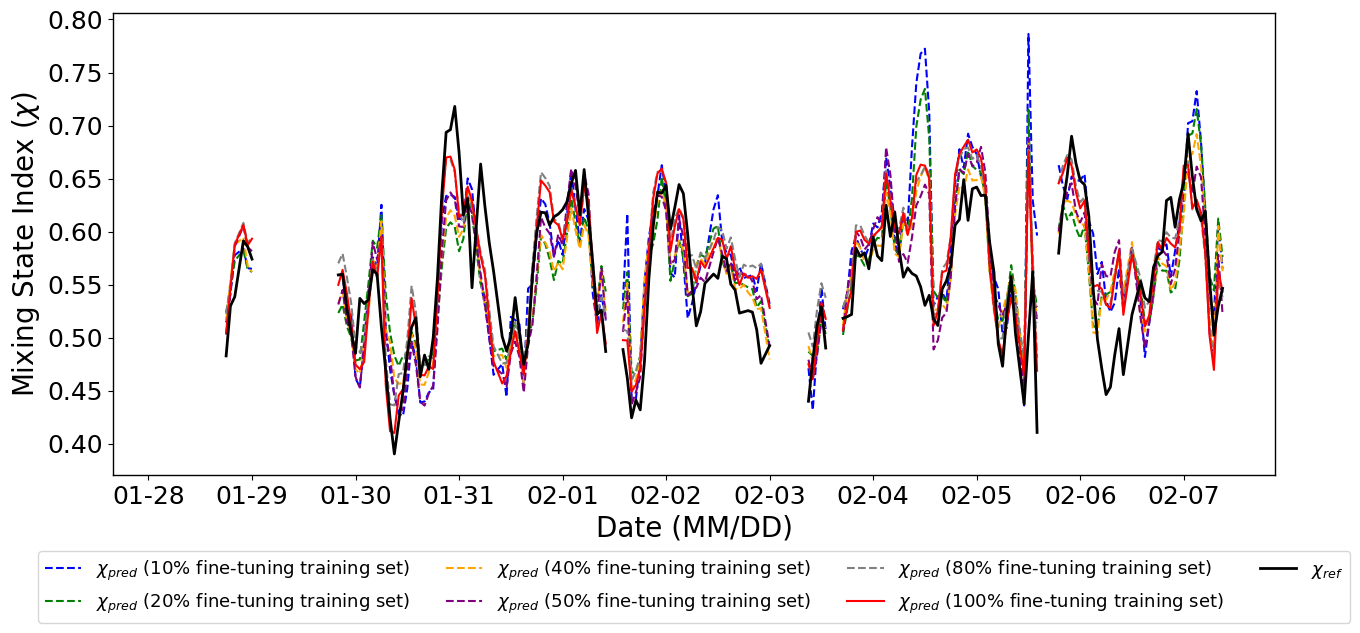

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


dataframes = {
    'data_10': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_5%Data.csv'),
    'data_20': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_10%Data.csv'),
    'data_40': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_20%Data.csv'),
    'data_50': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_25%Data.csv'), 
    'data_80': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_40%Data.csv'),  
    'data_100': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_50%Data.csv')
}

# Load the time data
time_data_path = '../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_50%.csv'
time_df = pd.read_csv(time_data_path)

# Extracting the 'Time' column for use as the time axis
time_series = pd.to_datetime(time_df['Time'])

# Calculate the time difference between consecutive time points
time_diff = time_series.diff().dt.total_seconds() / 3600.0  # convert time difference to hours

# Set a threshold for the gap (2 hours) and create a mask for large gaps
threshold = 2  # in hours
gap_mask = time_diff > threshold
colors = ['blue', 'green', 'orange', 'purple', 'gray', 'red']

percentages = [10, 20, 40, 50, 80, 100]

# Plotting y_pred values for each dataset with actual time, and breaking lines where gaps exceed 2 hours
plt.figure(figsize=(15, 6))


# Plot each dataset's y_pred, accounting for gaps
for i, (key, df) in enumerate(dataframes.items()):
    plt.plot(time_series[:len(df)].where(~gap_mask[:len(df)]), df['y_pred'], 
             label=f'$\\chi_{{pred}}$ ({percentages[i]}% fine-tuning training set)', linestyle='--' if percentages[i] != 100 else '-', color=colors[i])

# Overlay y_true, accounting for gaps
plt.plot(time_series[:len(dataframes['data_10'])].where(~gap_mask[:len(dataframes['data_10'])]), 
         dataframes['data_10']['y_true'], label='$\chi_{ref}$', color='black', linewidth=2)

# Adding labels and title
plt.xlabel('Date (MM/DD)', fontsize=20)
plt.ylabel('Mixing State Index ($\chi$)', fontsize=20)
# plt.title('Comparison of y_pred and y_true over Actual Time with Gaps Considered')
# Setting legend with specific font size and location
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=13)
plt.legend(loc='lower center',  ncol=4, fontsize=13, bbox_to_anchor=(0.5, -0.34))

# Setting the tick parameters and formatting for the x-axis
plt.tick_params(axis='both', labelsize=18)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Daily interval

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)
# Set the plot's border to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# plt.savefig('../graphics/pred_vs_true_comparison.pdf', dpi=400)

# Show the plot
plt.show()


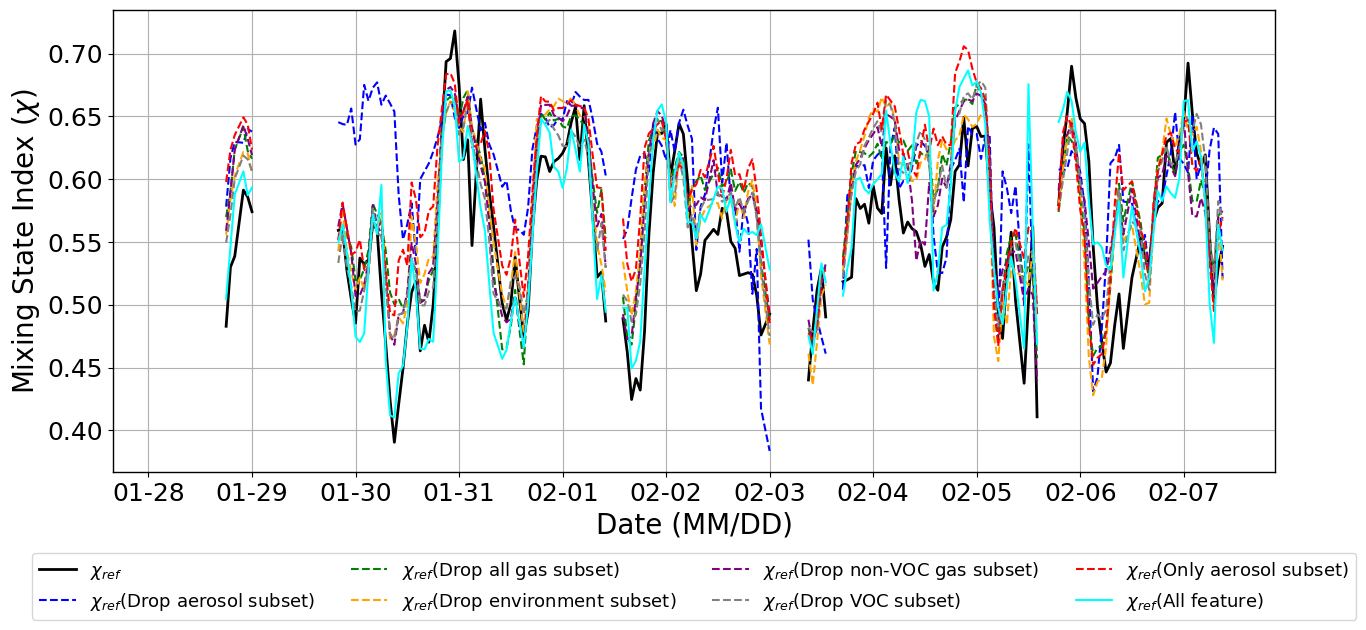

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


dataframes = {
    'data_10': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_DropAero_Data.csv'),
    'data_20': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_DropAllGas_Data.csv'),
    'data_40': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_DropEnv_Data.csv'),
    'data_50': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_DropNonVOC_Data.csv'), 
    'data_80': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_DropVOC_Data.csv'), 
    'data_90': pd.read_csv('../Data/Fine_tuned_Results_different_input_feature/Fine_tuning_onlyAero_Data.csv'),
    'data_100': pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_50%Data.csv')
}

# Load the time data
time_data_path = '../Data/MEGAPOLI_data/MEGAPOLI_Marine_test_50%.csv'
time_df = pd.read_csv(time_data_path)

# Extracting the 'Time' column for use as the time axis
time_series = pd.to_datetime(time_df['Time'])

# Calculate the time difference between consecutive time points
time_diff = time_series.diff().dt.total_seconds() / 3600.0  # convert time difference to hours

# Set a threshold for the gap (2 hours) and create a mask for large gaps
threshold = 2  # in hours
gap_mask = time_diff > threshold
colors = ['blue', 'green', 'orange', 'purple', 'gray', 'red', 'cyan']
percentages = [10, 20, 40, 50, 80, 90, 100]

label = ['$\chi_{ref}$(Drop aerosol subset)', '$\chi_{ref}$(Drop all gas subset)', '$\chi_{ref}$(Drop environment subset)', '$\chi_{ref}$(Drop non-VOC gas subset)',
         '$\chi_{ref}$(Drop VOC subset)', '$\chi_{ref}$(Only aerosol subset)', '$\chi_{ref}$(All feature)']
# Plotting y_pred values for each dataset with actual time, and breaking lines where gaps exceed 2 hours
plt.figure(figsize=(15, 6))

# Overlay y_true, accounting for gaps
plt.plot(time_series[:len(dataframes['data_10'])].where(~gap_mask[:len(dataframes['data_10'])]), 
         dataframes['data_10']['y_true'], label='$\chi_{ref}$', color='black', linewidth=2)

# Plot each dataset's y_pred, accounting for gaps
for i, (key, df) in enumerate(dataframes.items()):
    plt.plot(time_series[:len(df)].where(~gap_mask[:len(df)]), df['y_pred'], label=label[i],
              linestyle='--' if percentages[i] != 100 else '-', color=colors[i])

# Adding labels and title
plt.xlabel('Date (MM/DD)', fontsize=20)
plt.ylabel('Mixing State Index ($\chi$)', fontsize=20)
# plt.title('Comparison of y_pred and y_true over Actual Time with Gaps Considered')
# Setting legend with specific font size and location
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=13)
plt.legend(loc='lower center',  ncol=4, fontsize=13, bbox_to_anchor=(0.5, -0.34))
plt.grid(True)

# Setting the tick parameters and formatting for the x-axis
plt.tick_params(axis='both', labelsize=18)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Daily interval

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)
# Set the plot's border to black
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.savefig('../graphics/pred_vs_true_comparison_feature_importance.png', dpi=400)

# Show the plot
plt.show()

Fig S4(a): Temporal variation in the mixing state index (χ) for the MEGAPOLI training and testing groups, with data added between different training groups highlighted by colour background shading, representing fractions from 0% to 100%

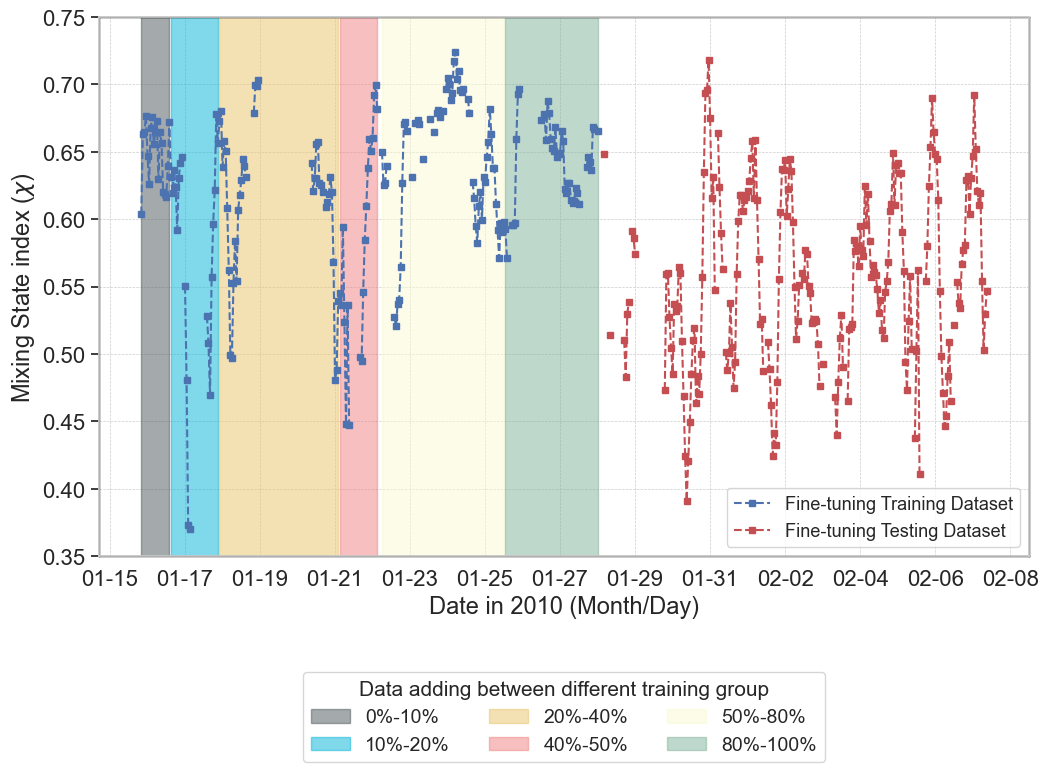

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.dates import DateFormatter, DayLocator

df = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine.csv')

# Set the style using seaborn
sns.set(style="whitegrid")

# Sample data creation (replace with your actual data)
# df = pd.DataFrame({'Time': [...], 'Chi': [...]})

# Convert the 'Time' column to datetime format for plotting
df['Time'] = pd.to_datetime(df['Time'])

# Determine the differences in the 'Time' column to find gaps
time_diffs = df['Time'].diff()
threshold = pd.Timedelta(hours=1)  # Threshold for significant time gaps
gap_indices = np.where(time_diffs > threshold)[0]  # Find gap indices



fig, ax = plt.subplots(figsize=(12, 7))

# Calculate the total number of data points
total_points = len(df)
mid_point = total_points // 2

# Add shaded regions based on the number of data points
highlight_ranges = [0.05,0.1, 0.2, 0.25, 0.4, 0.5]
start_point = [0, 0.05, 0.1, 0.2, 0.25, 0.4]
colors = ['#4A5759', '#00b4d8', '#e9c46a', 'lightcoral', 'lightgoldenrodyellow', '#81b29a']
highlight_patches = []

for i, percentage in enumerate(highlight_ranges):
    start = start_point[i]
    start_index = int(total_points * start)

#    start_index = int(total_points * (percentage - 0.1))
    end_index = int(total_points * percentage) - 1
    ax.axvspan(df['Time'].iloc[start_index], df['Time'].iloc[end_index], color=colors[i], alpha=0.5)
    highlight_patches.append(Patch(color=colors[i], alpha=0.5, label=f'{int(start*100)*2}%-{int(percentage*100)*2}%'))

# Plot the initial segment
if len(gap_indices) > 0:
    if gap_indices[0] < mid_point:
        line1, = ax.plot(df['Time'][:gap_indices[0]], df['Chi'][:gap_indices[0]], label='Training group', color='b', linestyle='--', marker='s', markersize=5)
    else:
        line1, = ax.plot(df['Time'][:gap_indices[0]], df['Chi'][:gap_indices[0]], label='Testing group', color='r', linestyle='--', marker='s', markersize=5)

# Plot segments between gaps
for start, end in zip(gap_indices, np.append(gap_indices[1:], len(df))):
    if end <= mid_point:
        line1, = ax.plot(df['Time'][start:end], df['Chi'][start:end], color='b', linestyle='--', marker='s', markersize=5)
    elif start >= mid_point:
        line2, = ax.plot(df['Time'][start:end], df['Chi'][start:end], color='r', linestyle='--', marker='s', markersize=5)
    else:
        line1, = ax.plot(df['Time'][start:mid_point], df['Chi'][start:mid_point], color='b', linestyle='--', marker='s', markersize=5)
        line2, = ax.plot(df['Time'][mid_point+1:end], df['Chi'][mid_point+1:end], color='r', linestyle='--', marker='s', markersize=5)

# Setting labels, title, and legend
ax.set_ylim(0.35, 0.75)
# ax.set_title('Mixing State Index Over Time - 100 nm To 700 nm', fontsize=16, fontweight='bold')

# Set x-axis major ticks to every five days
ax.xaxis.set_major_locator(DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
ax.set_xlabel('Date in 2010 (Month/Day)', fontsize=17)
ax.set_ylabel('Mixing State index ($\chi$)', fontsize=17)

# Add separate legends for the shaded regions and the lines
# highlight_legend = ax.legend(handles=highlight_patches, loc='upper left', fontsize=14, title='Highlight Ranges', bbox_to_anchor=(1.05, 1))
# line_legend = ax.legend([line1, line2], ['Training group', 'Testing group'], loc='lower right', fontsize=13)
# ax.add_artist(highlight_legend)



# Add a black border around the plot
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['left'].set_color('black')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=16)
# Create a secondary axis to handle the second legend
ax2 = ax.twinx()  # This shares the same x-axis but allows a separate set of plots

# Make the secondary y-axis invisible
ax2.get_yaxis().set_visible(False)

# First legend for highlight patches
legend1 = ax.legend(handles=highlight_patches, loc='lower center', bbox_to_anchor=(0.5, -0.4), 
                    title='Data adding between different training group', title_fontsize=15, 
                    fontsize=14, ncol=3)

# Second legend for MEGAPOLI groups on the secondary axis
legend2 = ax2.legend([line1, line2], ['Fine-tuning Training Dataset', 'Fine-tuning Testing Dataset'], 
                     loc='lower right', fontsize=13)

# plt.savefig('./MEGAPOLI_data/Observed_data.pdf', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()






Fig S4: Temporal variation in the mixing state index (χ) for the MEGAPOLI training and testing groups, with data added between different training groups highlighted by colour background shading, representing fractions from 0% to 100%

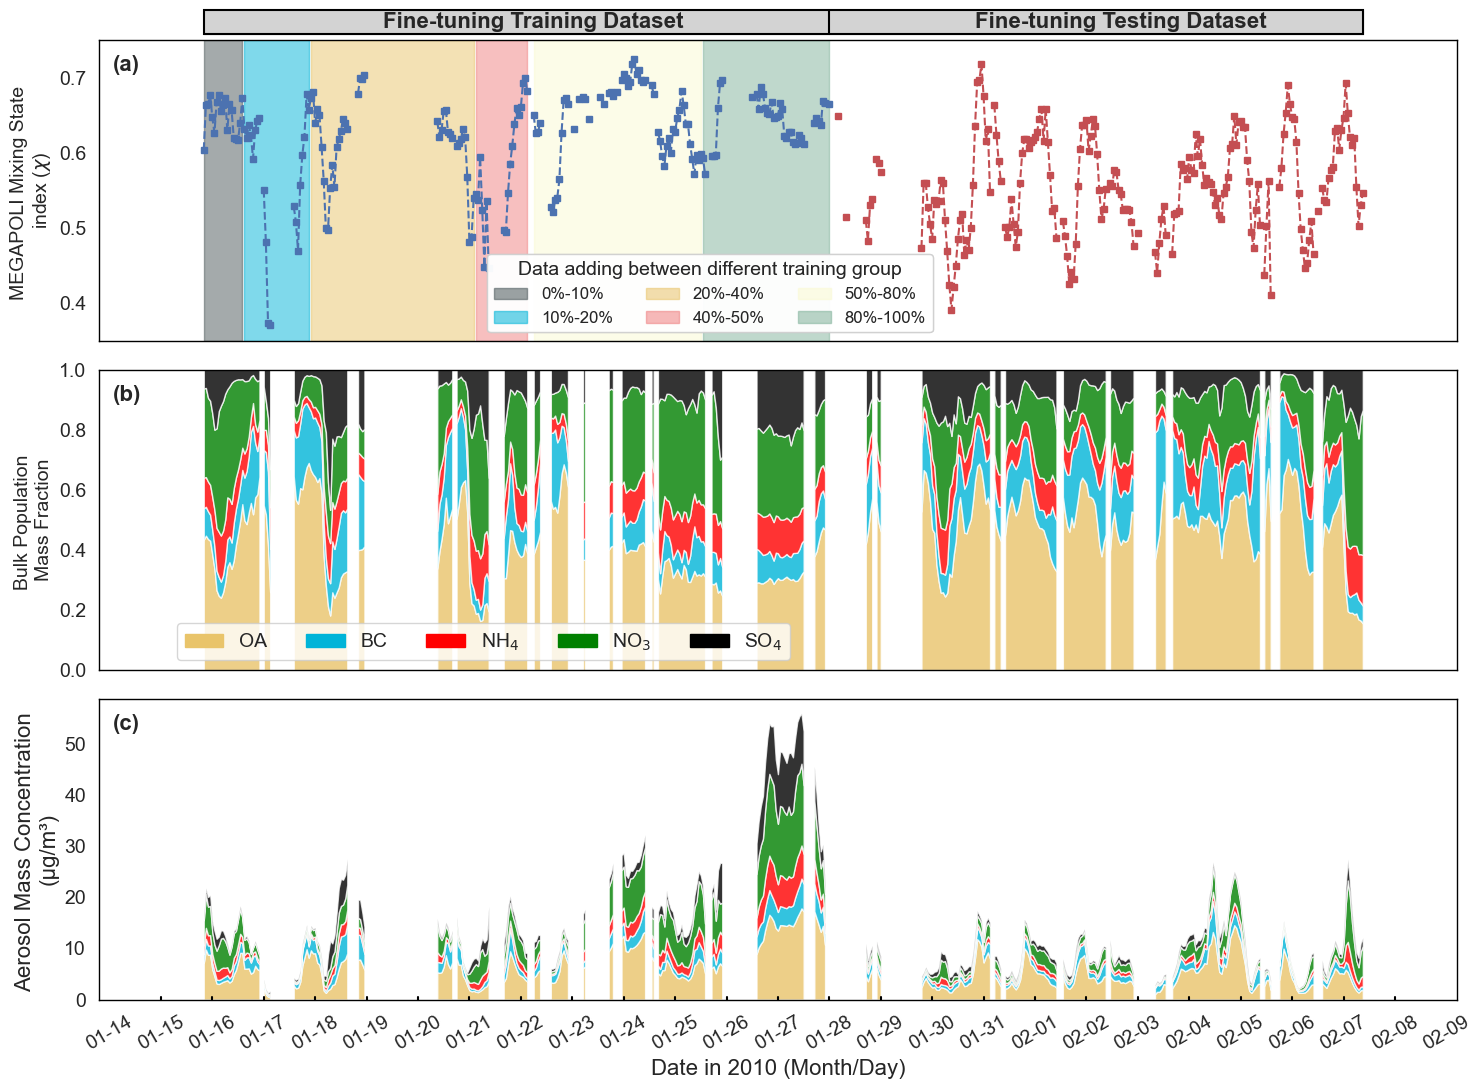

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.patches as mpatches
import seaborn as sns

# Load the MEGAPOLI dataset
df = pd.read_csv('../Data/MEGAPOLI_data/MEGAPOLI_Marine.csv') 

# Ensure 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# # Define aerosol columns and corresponding stackplot colors
aerosols = ['OA (ug/m3)', 'BC (ug/m3)', 'NH4 (ug/m3)', 'NO3 (ug/m3)', 'SO4 (ug/m3)']

stack_colors = ['#e9c46a', '#00b4d8', 'red', 'green', 'black']  

# Calculate aerosol mass fractions
df['Total Concentration'] = df[aerosols].sum(axis=1)
for aerosol in aerosols:
    df[f"{aerosol} fraction"] = df[aerosol] / df['Total Concentration']

# Detect time gaps exceeding 1 hour
time_diffs = df['Time'].diff()
threshold = pd.Timedelta(hours=1)  
gap_indices = np.where(time_diffs > threshold)[0]  

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 11), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

# Add subplot labels
ax1.text(0.01, 0.95, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax2.text(0.01, 0.95, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax3.text(0.01, 0.95, '(c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


# ====== Top Indicator Bar for Fine-Tuning ======
mid_point = len(df) // 2
mid_time = df['Time'].iloc[mid_point - 1]

# Add labeled gray bars for training/testing datasets
ax1.fill_betweenx([1.02, 1.10], df['Time'].iloc[0], mid_time, color='lightgray', transform=ax1.get_xaxis_transform(), clip_on=False)
ax1.fill_betweenx([1.02, 1.10], mid_time, df['Time'].iloc[-1], color='lightgray', transform=ax1.get_xaxis_transform(), clip_on=False)

ax1.plot([mid_time, mid_time], [1.02, 1.10], color='black', transform=ax1.get_xaxis_transform(), clip_on=False)

# Add text labels to the gray bars
ax1.text(df['Time'].iloc[mid_point // 2], 1.06, 'Fine-tuning Training Dataset', ha='center', va='center', 
         transform=ax1.get_xaxis_transform(), fontsize=16, fontweight='bold')
ax1.text(df['Time'].iloc[mid_point + mid_point // 2], 1.06, 'Fine-tuning Testing Dataset', ha='center', va='center', 
         transform=ax1.get_xaxis_transform(), fontsize=16, fontweight='bold')

# Add a border around the top bar
rect = mpatches.Rectangle((df['Time'].iloc[0], 1.02),  # Start point
                          width=(df['Time'].iloc[-1] - df['Time'].iloc[0]),  # Full width
                          height=0.08,  # Bar height
                          transform=ax1.get_xaxis_transform(), color='none', ec='black', lw=1.5, clip_on=False)
ax1.add_patch(rect)

# ====== Subplot 1: Mixing State Index (χ) ======
# Highlight data ranges
total_points = len(df)
highlight_ranges = [0.05, 0.1, 0.2, 0.25, 0.4, 0.5]
start_points = [0, 0.05, 0.1, 0.2, 0.25, 0.4]
colors = ['#4A5759', '#00b4d8', '#e9c46a', 'lightcoral', 'lightgoldenrodyellow', '#81b29a']
highlight_patches = []

for i, percentage in enumerate(highlight_ranges):
    start = start_points[i]
    start_index = int(total_points * start)
    end_index = int(total_points * percentage) - 1
    ax1.axvspan(df['Time'].iloc[start_index], df['Time'].iloc[end_index], color=colors[i], alpha=0.5)
    highlight_patches.append(Patch(color=colors[i], alpha=0.5, label=f'{int(start*100)*2}%-{int(percentage*100)*2}%'))

# Plot χ time series for training/testing segments
mid_point = total_points // 2
if len(gap_indices) > 0:
    if gap_indices[0] < mid_point:
        line1, = ax1.plot(df['Time'][:gap_indices[0]], df['Chi'][:gap_indices[0]], label='Training group', color='b', linestyle='--', marker='s', markersize=5)
    else:
        line1, = ax1.plot(df['Time'][:gap_indices[0]], df['Chi'][:gap_indices[0]], label='Testing group', color='r', linestyle='--', marker='s', markersize=5)

for start, end in zip(gap_indices, np.append(gap_indices[1:], len(df))):
    if end <= mid_point:
        line1, = ax1.plot(df['Time'][start:end], df['Chi'][start:end], color='b', linestyle='--', marker='s', markersize=5)
    elif start >= mid_point:
        line2, = ax1.plot(df['Time'][start:end], df['Chi'][start:end], color='r', linestyle='--', marker='s', markersize=5)
    else:
        line1, = ax1.plot(df['Time'][start:mid_point], df['Chi'][start:mid_point], color='b', linestyle='--', marker='s', markersize=5)
        line2, = ax1.plot(df['Time'][mid_point+1:end], df['Chi'][mid_point+1:end], color='r', linestyle='--', marker='s', markersize=5)

ax1.set_ylim(0.35, 0.75)
ax1.set_ylabel('MEGAPOLI Mixing State \nindex ($\chi$)', fontsize=14)
# ax1.legend(handles=[line1, line2], labels=['Fine-tuning Training Dataset', 'Fine-tuning Testing Dataset'], loc='lower right', fontsize=10)
ax1.grid(False)
ax1.tick_params(axis='y', which='major', labelsize=14)

highlight_legend = ax1.legend(handles=highlight_patches, loc='lower center', bbox_to_anchor=(0.45, 0), 
                              title='Data adding between different training group', title_fontsize=14, fontsize=12, ncol=3)
ax1.add_artist(highlight_legend)

# ====== Subplot 2: Aerosol Mass Fractions ======
for i, (start, end) in enumerate(zip(np.append([0], gap_indices), np.append(gap_indices, len(df)))):
    if start < len(df) and end <= len(df):  
        ax2.stackplot(df['Time'][start:end], [df[f"{aerosol} fraction"].iloc[start:end] for aerosol in aerosols], 
                      colors=stack_colors, alpha=0.8)


aerosol_labels = ['OA', 'BC', 'NH$_4$', 'NO$_3$', 'SO$_4$']

ax2.set_ylabel('Bulk Population \nMass Fraction', fontsize=14)
ax2.set_ylim(0, 1)
aerosol_patches = [Patch(color=stack_colors[i], label=aerosol) for i, aerosol in enumerate(aerosol_labels)]
ax2.legend(handles=aerosol_patches, loc='lower left', fontsize=14, ncol=5, bbox_to_anchor=(0.05, 0))
ax2.grid(False)
ax2.tick_params(axis='y', which='major', labelsize=14)


# ====== Subplot 3: Aerosol Mass Concentrations ======
# for start, end in zip(np.append([0], gap_indices), np.append(gap_indices, len(df))):
#     if start < len(df) and end <= len(df):
#         ax3.stackplot(df['Time'][start:end], [df[aerosol].iloc[start:end] for aerosol in aerosols],
#                       colors=stack_colors, alpha=0.8)


for i, (start, end) in enumerate(zip(np.append([0], gap_indices), np.append(gap_indices, len(df)))):
    # Only set labels on the first segment to avoid 'NoneType' errors
    if start < len(df) and end <= len(df):  # Ensure start and end are within bounds
        if i == 0:
            ax3.stackplot(df['Time'][start:end], df[aerosols].iloc[start:end].T, labels=aerosols, colors=stack_colors, alpha=0.8)
        else:
            ax3.stackplot(df['Time'][start:end], df[aerosols].iloc[start:end].T, colors=stack_colors, alpha=0.8)

ax3.set_ylabel('Aerosol Mass Concentration \n(µg/m³)', fontsize=16)
ax3.set_xlabel('Date in 2010 (Month/Day)', fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=14)
# ax3.legend(handles=aerosol_patches, loc='upper left', fontsize=10)
ax3.grid(False)

ax3.xaxis.set_major_locator(DayLocator(interval=1))
ax3.xaxis.set_major_formatter(DateFormatter('%m-%d'))
plt.setp(ax3.get_xticklabels(), rotation=30)  

xticks = ax3.get_xticks()  
for xtick in xticks:
    ax3.plot([xtick, xtick], [0.01, 0], color='black', lw=1.5, transform=ax3.get_xaxis_transform(), clip_on=False)

for ax in [ax1, ax2, ax3]:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

plt.tight_layout()

# plt.savefig('./graphics/MEGAPOLI_chi_and_aerosol.pdf', dpi=400, bbox_inches='tight')

plt.show()


Fig 2(a)(b): RMSE and R2 values of pre-trained foundation model, linear regression (LR), AutoML and fine-tuned model on the MEGAPOLI testing set. 

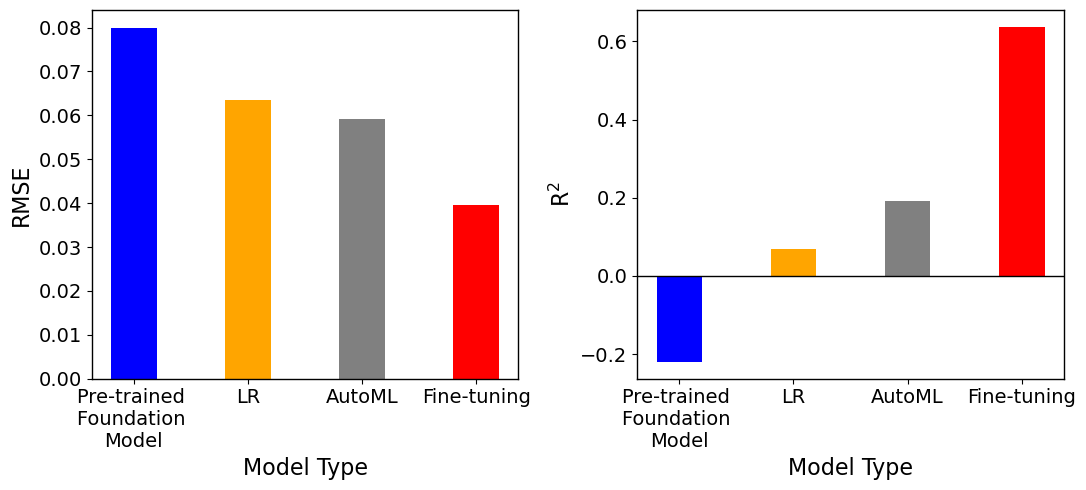

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

AutoML_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/AutoML_50%Data.csv')
Fine_tine_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_50%Data.csv')
LR_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/LR_50%Data.csv')

def calculate_data(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_AutoML_data, r2_AutoML_data = calculate_data(AutoML_data['y_true'], AutoML_data['y_pred'])
rmse_Fine_tine_data, r2_Fine_tine_data = calculate_data(Fine_tine_data['y_true'], Fine_tine_data['y_pred'])
rmse_LR_data, r2_LR_data = calculate_data(LR_data['y_true'], LR_data['y_pred'])


# Corrected data
data_corrected = {
    'Model Type': ['Pre-trained \nFoundation \nModel', 'LR', 'AutoML', 'Fine-tuning'],
    'Data size (training)': ['100% (195)', '100% (195)', '100% (195)', '100% (195)'],
    'R^2': [-0.22, float(r2_LR_data), float(r2_AutoML_data), float(r2_Fine_tine_data)],
    'RMSE': [0.08, float(rmse_LR_data), float(rmse_AutoML_data), float(rmse_Fine_tine_data)]
}

# Create a DataFrame
df = pd.DataFrame(data_corrected)

# Set bar width and label font size
bar_width = 0.4
label_fontsize = 14
fontsize = 16

# Plot RMSE
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.bar(df['Model Type'], df['RMSE'], width=bar_width, color=['blue', 'orange', 'gray', 'red'])
plt.xlabel('Model Type', fontsize=fontsize)
plt.ylabel('RMSE', fontsize=fontsize)
# plt.title('RMSE by Model Type', fontsize=title_fontsize)
plt.tick_params(axis='both', labelsize=label_fontsize )
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# Plot R^2
plt.subplot(1, 2, 2)
plt.bar(df['Model Type'], df['R^2'], width=bar_width, color=['blue', 'orange', 'gray', 'red'])
plt.xlabel('Model Type', fontsize=fontsize)
plt.ylabel('R$^2$', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=label_fontsize )
plt.axhline(y=0, color='black', linewidth=1)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# plt.title('R^2 by Model Type', fontsize=title_fontsize)

# Adjust layout
plt.tight_layout()
plt.savefig('../graphics/Four_Model_Comparsion(Fine-tuning, baseline and pre-trained foundation model).pdf', dpi=400, bbox_inches='tight')

plt.show()

Fig 2(c): RMSE values for different models (linear regression, AutoML and fine-tuned model) as a function of the fraction of MEGAPOLI training data used (10% to 100%).

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

AutoML_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/AutoML_50%Data.csv')
Fine_tine_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/Fine_tuning_50%Data.csv')
LR_data = pd.read_csv('../Data/Fine_tuned_Results_different_data_size/LR_50%Data.csv')

def calculate_data(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse, r2 = calculate_data(AutoML_data['y_true'], AutoML_data['y_pred'])
float(rmse)

0.0592153277433862

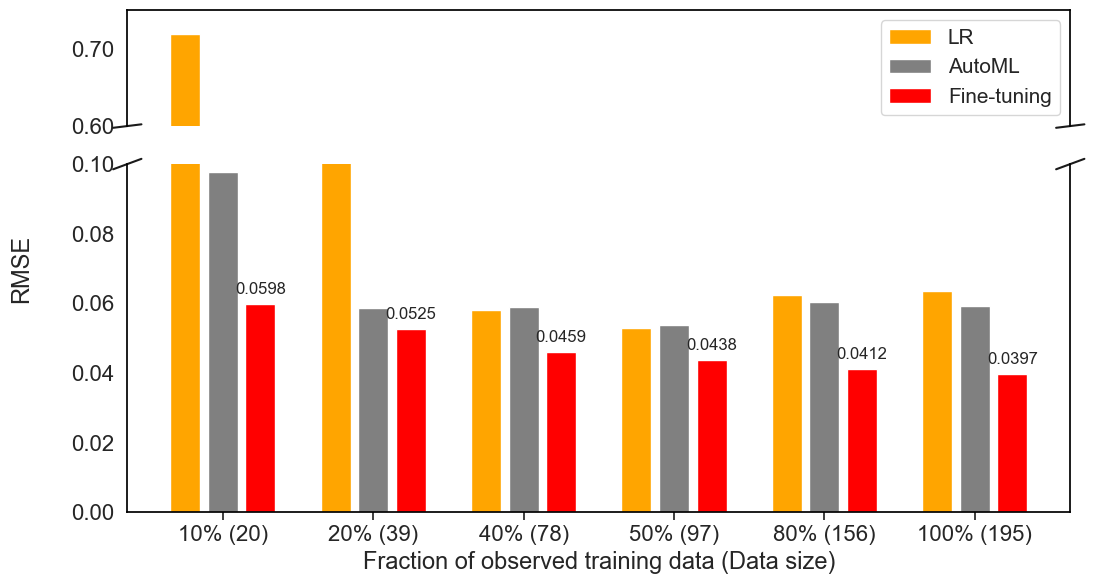

In [ ]:
# Corrected data
data_corrected = {
    'Model Type': ['LR', 'AutoML', 'Fine-tuning', 'LR', 'AutoML', 'Fine-tuning', 'LR', 'AutoML', 'Fine-tuning', 
                   'LR', 'AutoML', 'Fine-tuning', 'LR', 'AutoML', 'Fine-tuning', 
                   'LR', 'AutoML', 'Fine-tuning'],
    'Data size (training)': ['10% (20)', '10% (20)', '10% (20)', '20% (39)', '20% (39)', '20% (39)', '40% (78)', '40% (78)', '40% (78)', 
                             '50% (97)', '50% (97)', '50% (97)', '80% (156)', '80% (156)', '80% (156)', 
                             '100% (195)', '100% (195)', '100% (195)'],

    'RMSE': [0.7192, 0.0978, 0.0598, 0.1139, 0.0588, 0.0525, 0.0581, 0.0589, 0.0459, 0.0530, 0.0538, 0.0438, 0.0624, 0.0604, 
             0.0412, 0.0635, 0.0592, 0.0397]
}

# Create DataFrame
df_corrected = pd.DataFrame(data_corrected)

# Ensure the order of 'Data size (training)'
df_corrected['Data size (training)'] = pd.Categorical(df_corrected['Data size (training)'], 
                                                      categories=['10% (20)', '20% (39)', '40% (78)', '50% (97)', 
                                                                  '80% (156)', '100% (195)'], 
                                                      ordered=True)

# Sort the DataFrame to ensure the order of Model Type and Data Size
df_corrected['Model Type'] = pd.Categorical(df_corrected['Model Type'], categories=['LR', 'AutoML', 'Fine-tuning'], ordered=True)
df_corrected = df_corrected.sort_values(['Data size (training)', 'Model Type'])

# Pivot the DataFrame
df_pivot = df_corrected.pivot(index='Data size (training)', columns='Model Type', values=['RMSE']).reset_index()

# Define colors for each model type
colors = {'LR': 'orange', 'AutoML': 'gray', 'Fine-tuning': 'red'}

# Set bar width
bar_width = 0.2
bar_spacing = 0.05
groups = df_pivot['Data size (training)']
indices = np.arange(len(groups))

# Adjusting the relative heights of the subplots
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11, 6), gridspec_kw={'height_ratios': [1, 3]})

# Plot each model type for RMSE on both axes
for i, model in enumerate(df_corrected['Model Type'].cat.categories):
    values_rmse = df_pivot[('RMSE', model)]
    positions = indices + i * (bar_width + bar_spacing)
    ax.bar(positions, values_rmse, width=bar_width, color=colors[model], label=model)
    ax2.bar(positions, values_rmse, width=bar_width, color=colors[model])

# Customize RMSE plot
ax.set_ylim(0.6, 0.75)  # upper part of the y-axis for the outliers
ax2.set_ylim(0, 0.1)  # lower part of the y-axis for most of the data
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Draw diagonal lines to show break
d = 0.015  # size of diagonal lines
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)  # Remove the bottom border of the top plot
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

ax2.spines['top'].set_visible(False)  # Remove the top border of the bottom plot
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')

label_size = 17  # Adjust this to control label sizes
tick_label_size = 16  # Adjust this to control tick label sizes

# Set labels and legends with the specified label size
ax2.set_ylabel('RMSE', fontsize=label_size)
ax2.yaxis.set_label_coords(-0.1, 0.7)  # Move the y-label upwards by adjusting y-coordinate
ax2.set_xlabel('Fraction of observed training data (Data size)', fontsize=label_size)
ax2.set_xticks(indices + (bar_width + bar_spacing))
ax2.set_xticklabels(groups, rotation=0)
ax2.tick_params(axis='both', labelsize=tick_label_size)  # Set tick label size
ax.tick_params(axis='both', labelsize=tick_label_size)  # Set tick label size for the first plot
ax.legend(fontsize=label_size - 2, loc='upper right')  # Adjust legend font size if necessary



ax.grid(False)
ax2.grid(False)


# Add text labels for Fine-tuning results on both axes
fine_tuning_values_ax = df_pivot[('RMSE', 'Fine-tuning')][ax.get_ylim()[0] < df_pivot[('RMSE', 'Fine-tuning')]]
fine_tuning_positions_ax = indices + 2 * (bar_width + bar_spacing)
for pos, value in zip(fine_tuning_positions_ax, fine_tuning_values_ax):
    ax.text(pos, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

fine_tuning_values_ax2 = df_pivot[('RMSE', 'Fine-tuning')][df_pivot[('RMSE', 'Fine-tuning')] <= ax2.get_ylim()[1]]
fine_tuning_positions_ax2 = indices + 2 * (bar_width + bar_spacing)
for pos, value in zip(fine_tuning_positions_ax2, fine_tuning_values_ax2):
    ax2.text(pos, value + 0.002, f'{value:.4f}', ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.show()
